NAME: MOHSIN IRFAN

STUDENT_ID: W1863288


MODULE: APPLIED AI

Part A:

The application of Artificial Intelligence (AI) within market analysis has been a rapidly growing field in recent years AI has been used to analyze massive amounts of data in order to identify patterns that can be used to predict future market trends. Market analysis tools based on artificial intelligence are being used to identify customer preferences, predict behavior of customers, and optimize pricing strategies.
One example of AI-based market analysis is the use of machine learning algorithms to analyze. Different Machine Learning techniques are being used for the House Price prediction project. These AI techniques predicts an output based upon different features like Number_of_bedrooms, total_area and others.
Another example of this is a study from the University of Cambridge that employed a decision tree algorithm to forecast housing costs in the United Kingdom. The study made use of a dataset that included details on a variety of houses, including their square footage, number of bathrooms, bedrooms, and location. The decision tree model was found to have an accuracy of about 80% in predicting the sale price of a property.
Traditional home features can be used as input for machine learning systems to anticipate housing values. For this goal, we have used three algorithms in this study. Support vector machines (SVMs) are useful for creating precise predictions since they are thought to be a potent tool for handling high dimensional, semi-structured, and unstructured data. (Hassanien et al., 2018). SVMs are frequently used in the business world to forecast a company's overall sales and revenue. We also employ the Random Forest (RF) technique because, by combining several decision trees, it can lessen the overfitting of data. Additionally, RF is a reliable method that has demonstrated to deliver precise predictions in property research. (Mullainathan & Spiess, 2017)
In several instances, it was even discovered that ANNs outperformed more traditional statistical techniques for predicting housing prices. In a study, an ANN model was trained on a dataset of home prices in the Boston area, for example, and the findings showed that the model was able to predict house prices currently on the market with accuracy. (Tran and Nguyen, 2018).  In a study by, an ANN model was able to outperform traditional linear regression models for predicting house prices in the Saudia Arabias market (2018) (ALZain, 2017)
RF and GBM have also been found to be useful techniques for predicting home prices. A study suggests that an RF model could provide accurate estimates of house values in the Malaysian market. (Winky K.O , 2019). Similar to this, it was found that GBM had good accuracy in predicting Spanish housing values. (Pérez-Rave, 2019)
Several research have used ensemble techniques, which combine numerous models, to increase forecast accuracy. For instance, a study found that employing an ensemble of several ANN models rather than a single ANN model improved the accuracy of house price predictions in the Chinese market. (Chen , 2018)
Natural language processing (NLP) techniques are another example of AI-based market analysis. NLP techniques can be used to extract insights about customer sentiment and preferences from large amounts of text data, such as customer reviews or social media posts. This type of analysis can assist businesses in better understanding the needs of their customers and developing more effective marketing strategies. (Chen, 2017)
Finally, AI-based market analysis tools have been used to optimize pricing. AI-powered pricing optimization tools can analyze massive amounts of data on previous sales and customer behavior to determine the best price for a product or service.
Overall, AI-based market analysis has become an increasingly important tool for businesses seeking to gain insights into the needs and preferences of their customers in order to develop more effective marketing strategies. Businesses can gain valuable insights into their customers' needs and behaviors by leveraging the power of AI-based tools, allowing them to make better decisions about their marketing strategies.

References:
Zillow (2017). [online] Available at: https://www.zillow.com/research/zillow-home-value-forecast-20165/ [Accessed 3 Jan. 2023]

Deng, Kamgar and Zou (2019). A Comparative Study of Machine Learning Algorithms for Housing Price Prediction. Real Estate Economics,

Winky K.O, W. and Tang, B.-S. (2020). Predicting property prices with machine learning algorithms. [online] Available at: https://www.tandfonline.com/doi/full/10.1080/09599916.2020.1832558.

ALZain, E., Alshebami, A.S., Aldhyani, T. and Saleh (2022). Application of Artificial Intelligence for Predicting Real Estate Prices: The Case of Saudi Arabia. [online] Available at: https://www.mdpi.com/2079-9292/11/21/3448.

Thoms, R. and Tang, P. (21AD). Housing Price Prediction Using Machine Learning Algorithms in COVID-19 Times. [online] Available at: https://www.mdpi.com/2073-445X/11/11/2100.

Part B:
•	Supervised Learning:

Supervised Learning like Linear Regression can be applied to the House Price Prediction to predict the price of the house based upon the inputs like location, area, number of rooms, age. It can produce results with very much accuracy and can help user to buy or sell a house with a accurate price.
There are 2 type of Linear Regressions, Simple and Multiple
Simple Linear Regression is when there is only 1 independent variable present in the dataset. The equation is given as:
y = b0 + b1*x
(Saishruthi Swaminathan, 2018)
where b0 and b1 are the model parameters (also called as the intercept and slope, respectively) and x is the independent variable. The goal is to determine the b0 and b1 values that best suit the data, which is commonly accomplished by reducing the sum of squared errors.

Multiple Linear Regression is given as:
y = b0 + b1x1 + b2x2 + ... + bn*xn

where the independent variables are x1, x2,..., xn and the model parameters are b0, b1, b2,..., bn. Using matrix notation, the following can be expressed more succinctly:

y = b0 + Xb

where b is the vector of coefficients [b0, b1, b2,..., bn] and X is the design matrix with n columns—one for each independent variable—and 1 row—each observation.
Finding b values that reduce the total squared errors is the objective. (Sangeet Aggarwal, 2020)

Linear Regression regression is a widely used statistical modeling technique in which the probability of an outcome is related to a series of potential predictor. (Dhyan Adler-Belendez, 2020)
The fundamental goal of a Linear Regression model is to determine the best fit linear line and the ideal intercept and coefficient values such that the error is minimized. 
When other independent variables are held constant, regression analysis helps us understand how the value of the dependent variable changes in relation to an independent variable. It forecasts continuous/real-world data such as temperature, age, and wage.

o	Advantages:
1.	Using Supervised Learning for House Price prediction can provide results with really high accuracy.
2.	Supervised Learning models can be trained or very large datasets and can find patterns within the dataset to make better predictions. (Satyavishnumolakala, 2020)
3.	Another benefit of using supervised learning is that it is simple to update and improve. As new information comes to light, the algorithm can be re-trained and make better prediction. (Daniel Johnson, 2022)

4.	Over-fitting can occur with linear regression, however it can be prevented by employing cross-validation, regularization (L1 and L2) techniques, and some dimensionality reduction approaches.

o	Disadvantages:
1.	The output completely depends on the type of data we are running a model on. If our data have a lot of errors, then our output will also have a lot of errors. (Satyavishnumolakala, 2020)
2.	They do not generalize when we input new data points because it is positive towards overfitting . (Naresh Kumar, 2019)
3.	Sometimes it is difficult to interpret how a specific Machine Learning model has made a prediction and given us a particular accuracy.
4.	In order to fit complex datasets, linear regression requires that the input and output variables have a linear relationship. Since the relationships between the variables in the dataset are often nonlinear, a straight line cannot accurately match the data. (Sangeet Aggarwal, 2020)

•	Natural Language Processing:

Natural Language Processing (NLP) is a computerized method to text analysis that is based on a set of theories as well as a collection of technology. (Elizabeth D. Liddy, 2001)
Natural Language Processing can be used for our House Price Prediction using the features like description, area_reviews, previous_landlord_reviews  etc. A nlp model can be trained on these features and can be used to predict the output.
It can be used to identify the keywords in description like “luxury”, “suitable”, “big”, “bad infrastructure” etc. and can help to predict the output.
Using natural language processing (NLP) to anticipate house prices entails detecting relevant terms and phrases in property descriptions and using them as inputs into a machine learning model. Certain adjectives, such as "luxurious," "ocean-facing," and "garden," for example, can indicate that a house is more valuable than others. Furthermore, terms like "recently built" or "renovated" can imply that the house is newer and hence more valued.

Sentiment analysis can be performed on features like area_reviews and previous_landlord_reviews and we can predict the price of the house based upon its sentiment.

o	Advantages:
1.	It can help to automate the process of gathering data from written sources, such as real estate listings or property descriptions.
2.	It helps to identify and extract useful information from unstructured text data. Different words can let us know which of the words express prices as higher or lower. (Giuseppe Martino Di Giuda, 2020)
3.	It can be used to extract useful information from the property description which helps to predict whether a property is worth more or less and it provides a better understanding of the property rather just using numerical data.
4.	The worth of the property can be determined using Sentiment analysis. Sentiment analysis can be performed on different reviews regarding that property which can helps us to predict whether a property is valuable or not.

o	Disadvantages:
1.	Sometimes it can be difficult to train the NLP model and expect higher accuracy because some words are have different meanings but are still used in other sense which can be easier to understand by humans but sometimes not by the NLP algorithm. (Ximena Bolaños, 2020)

2.	It is difficult to train the algorithm using the unstructured data, data having grammatical mistakes, spelling mistakes hence the algorithm could be less effective have less accuracy.

3.	If the data is not complete and has a lot of mistakes in it moreover has a lower quality of data, then it may lead to very inaccurate predictions.  (Mirko Locatelli, 2020 )
4.	Natural Language Processing can be computationally expensive and sometimes it may require a lot of computational power in order to run the model. (Ximena Bolaños, 2020)
5.	In most of the cases, NLP requires large amount of data in order to produce accurate results which may not be possible in the case of House Price Prediction. (Madhurjya Chowdhury, 2021)
6.	NLP is not yet fully ready to be used everywhere and still there are a lot improvements needed in this field.

At the end, NLP is not the best tool for predicting House Price prediction because it is an regression problem.

•	Unsupervised Learning:

Unsupervised learning is a type of machine learning that doesn't depend on labelled data or prior knowledge of a dataset; instead, it uses statistical techniques to find patterns and relationships in the data. By figuring out the structure and features in the data, it can be used to predict house prices.
The purpose of the machine is to construct representations of the input that may be utilized for decision making, predicting future inputs, and efficiently transferring the inputs to another machine. (Zoubin Ghahramani , 2019)
Unsupervised learning can be used for house price estimation by utilizing clustering algorithms to classify similar houses based on their attributes, then taking the average price of houses within each cluster as a prediction for new houses with similar characteristics.
Kmeans clustering is relatively easy and one of the most common algorithm but using it for House Price Prediction will not be the best option for applications like House Price Prediction. (Tenzin Kunsang, 2019).
It is one of the most common algorithm used hence we can find a lot of libraries in different languages in order to implement it. One of the main reason it has a lot of implementations is because it is a very well studies and clustering algorithm (Christina Ellis, 2018)

o	Advantages:
1.	Without any prior information or labels, unsupervised learning can find patterns and relationships in the data, allowing it to make predictions on fresh datasets without the need for manual labelling. (Sara McCarney, 2021)
2.	Unsupervised learning algorithms can detect precise patterns in data that humans may miss, making them perfect for predicting property prices. They can consider factors such as location, size, age, and other characteristics that are not immediately evident.
3.	Unsupervised learning algorithms can learn from their mistakes and improve over time, which means they can get more accurate as more data points are added. (Marina Santini, 2016))
There are some disadvantages associated with using unsupervised learning for house price prediction

o	Disadvantages:
1.	It takes a significant amount of computer power and resources to analyze massive amounts of data fast and properly, making it computationally very expensive.
2.	Because unsupervised learning does not provide clear outcomes and the findings are not always immediately actionable, it is less appropriate for certain applications like House Price Prediction.
3.	Scale sensitive: rescaling your datasets (normalization or standardization) will drastically affect the results. While this itself is not bad.(Marina Santini, 2016)
After careful consideration, the dataset that we are going to use contains labelled data and we in our project requires a proper output with a particular value i.e. price. Our main goal is to predict the price of the house that will not be possible using Unsupervised Learning (KMeans clustering algorithm).


References:
Oki, K., Bagirov, A.M. and Napsu Karmitsa (2019). Clusterwise linear regression. [online] Available at: https://reader.elsevier.com/reader/sd/pii/S0377221720303830?token=EBB27D24A0F85616B1ABABF958813445794B89424D9C7B1417A1F61E1137EEF47947E97451B9380C06736398BDE2CE7F&originRegion=eu-west-1&originCreation=20230110164224.
Tu, J.V. (n.d.). Advantages and Disadvantages of Using Artificial Neural Networks. [online] Available at: https://www.sciencedirect.com/science/article/pii/S0895435696000029.
 Singh, N. (n.d.). Advantages and Disadvantages of Linear Regression. [online] Available at: https://iq.opengenus.org/advantages-and-disadvantages-of-linear-regression/.

Shin, T. (2021). 3 Reasons Why You Should Use Linear Regression Models Instead of Neural Networks. [online] Available at: https://towardsdatascience.com/3-reasons-why-you-should-use-linear-regression-models-instead-of-neural-networks-16820319d644.
Di Giuda, G.M., Locatelli, M., Schievano, M. and Pellegrini, L. (2020). Natural Language Processing for Information and Project Management. [online] Available at: https://www.researchgate.net/publication/338280158_Natural_Language_Processing_for_Information_and_Project_Management.

Hagiwara, M. (n.d.). Real World Natural Language Processing. [online] Available at: https://www.google.co.uk/books/edition/Real_World_Natural_Language_Processing/Ok5NEAAAQBAJ?hl=en&gbpv=1&dq=how+natural+language+processing+can+be+used+for+house+price+prediction%3F&pg=PA27&printsec=frontcover.

Vellido, A. (n.d.). Neural networks in business: a survey of applications. [online] Available at: https://www.sciencedirect.com/science/article/pii/S0957417499000160?casa_token=xkdMfcxK7TMAAAAA:2zXci0Z23NkiCC7Wk82qXQ41PoYYlK52bRI4jrrXFJQdlDXwsohSYMgImO2STA-1zOFcx4rX.

Kunsang, T. (2020). K-Means Clustering of homes and neighborhoods in Minneapolis. [online] Medium. Available at: https://medium.com/@tenzkunsang648/k-means-clustering-of-homes-and-neighborhoods-in-minneapolis-6b4fb02bc308 [Accessed 10 Jan. 2023].

Santini, M. (n.d.). Advantages & Disadvantages of k-Means and Hierarchical clustering (Unsupervised Learning). [online] Available at: http://santini.se/teaching/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf.


PART C: IMPLEMENTATON
a. HIGH LEVLE DIAGRAM

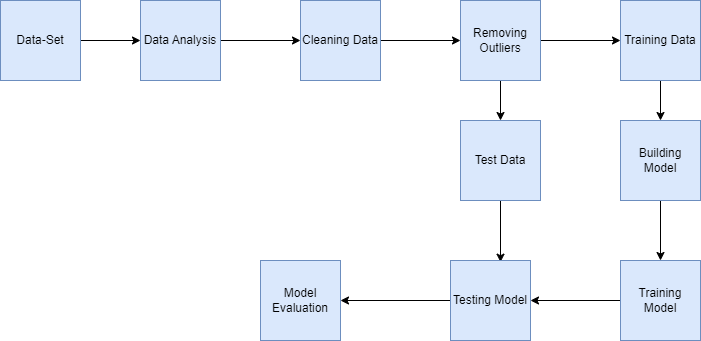

In [1]:
from PIL import Image
Image.open('high_levle_diagram.png')

PART C: IMPLEMENTATON
b.

The data has been taken from the following link https://opendata.com.pk/dataset/property-data-for-pakistan. This dataset includes multiple features but as I am not going to use all of them so I will drop few features like locationid, page_url, province_name, latitude, longitude, date_added, agency e.t.c later in the code.
The data set has been modified upto one city i.e Lahore. As our data set is really hude and does contains data all around the country having different cities covered and within each city different areas (locations) are covered as well so I restricted the data to just one city but covering different areas of that city

PART C: IMPLEMENTATION
c.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import plotly.graph_objects as go
import matplotlib
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv("zameen-updated.csv")
dataset.head()      

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
df = dataset
df.info()

# as we can see we have a lot of data and alot of features that we are not gonna use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [6]:
df.isna().sum()
# as we can see only agency and agent got the null values 
# as we are going to remove those columns so we dont specifically need to remove the na values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

<AxesSubplot:>

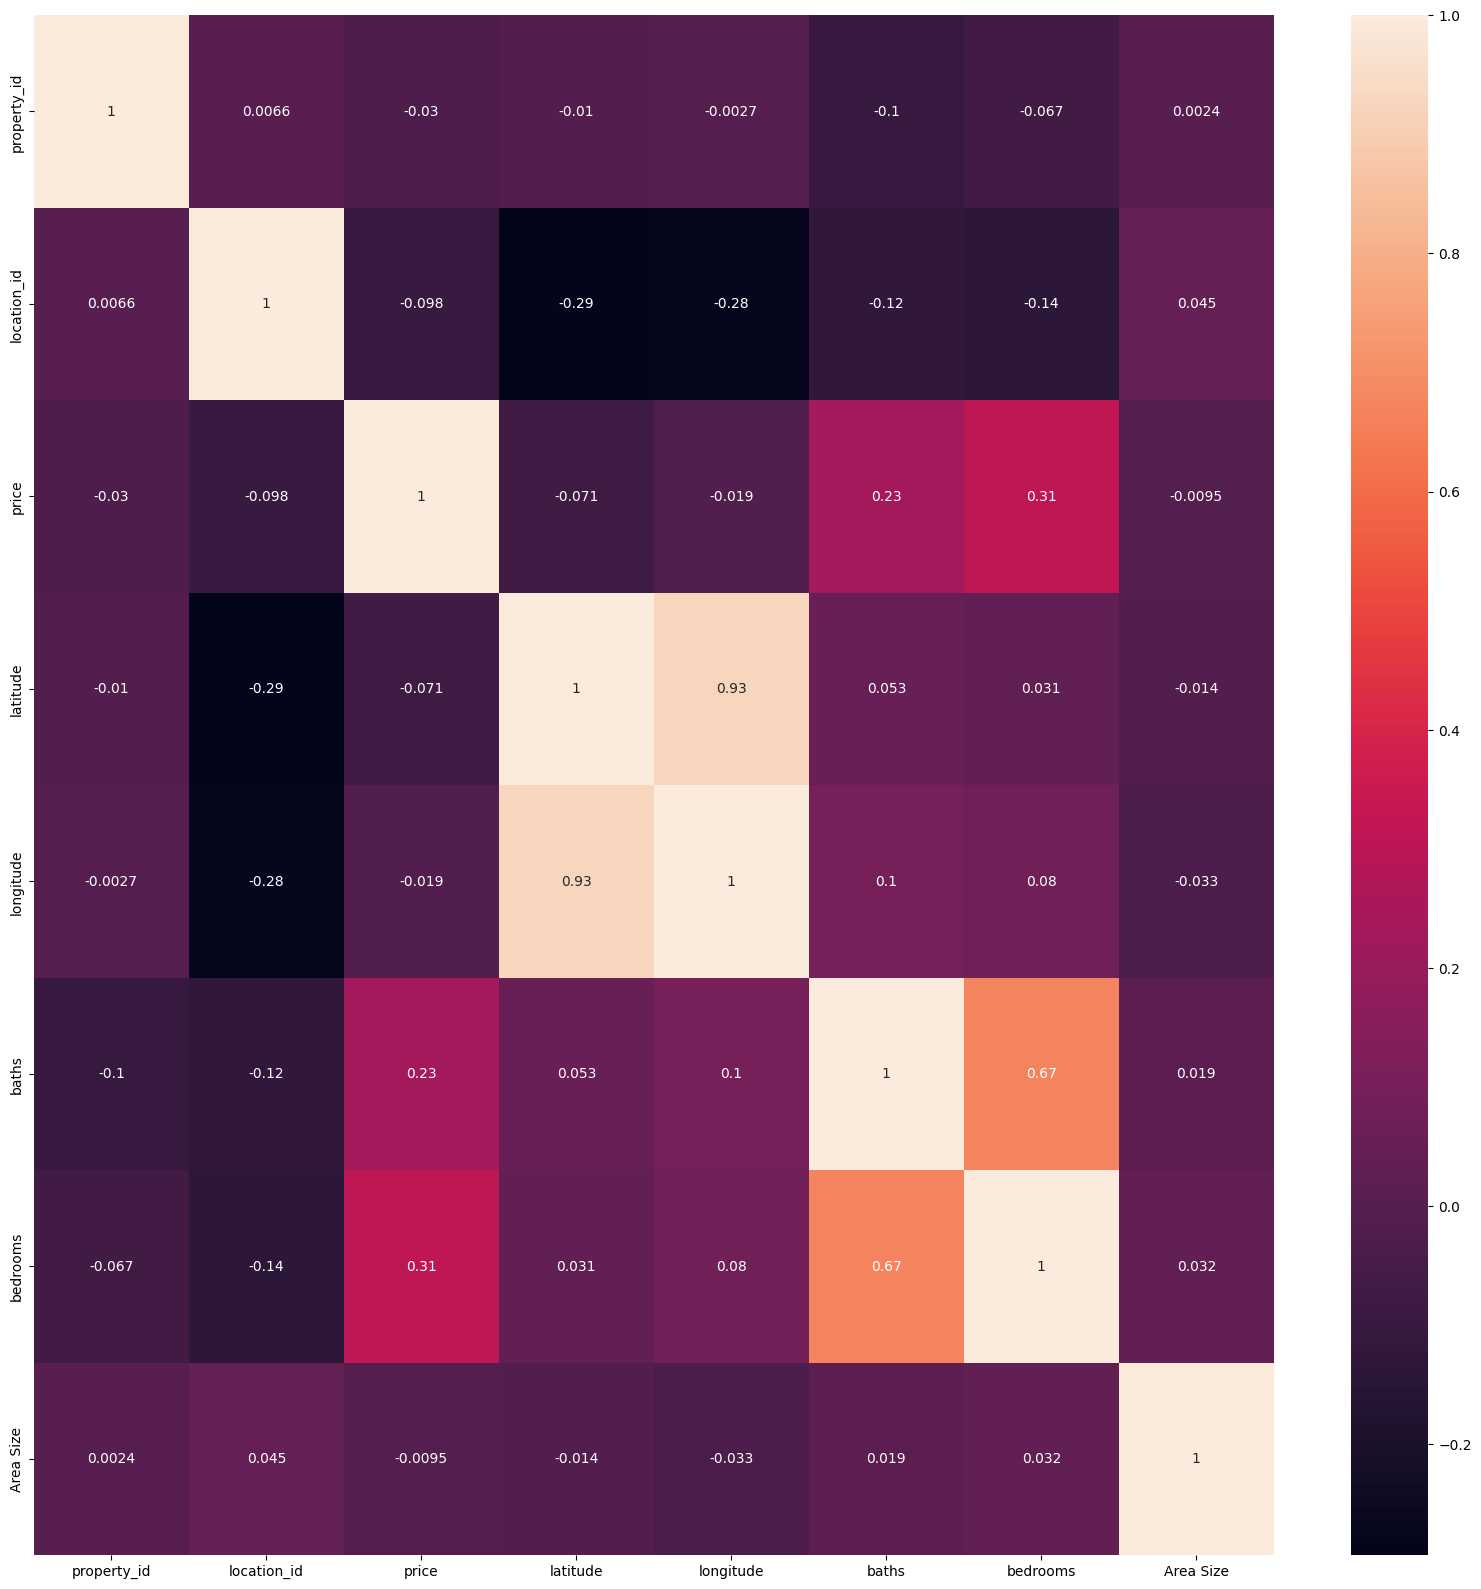

In [7]:
plt.figure(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [8]:
df["city"].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [9]:
df["city"].value_counts()

Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: city, dtype: int64

In [10]:
#as we can see there are different cities within the same dataset so lets just reduce it to one city
#i will only keep the data related to the city Lahore becuase there hasnt been much of the machine Learning work for Lahore

In [11]:
df = df[df["city"] == "Lahore"]
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
47,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan,Kanal,6.0,5-10 Kanal
48,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B,Kanal,1.0,1-5 Kanal
49,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar",Marla,9.0,5-10 Marla
50,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
51,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN,Marla,11.0,10-15 Marla


In [12]:
df=df.drop(['property_id','location_id','page_url','date_added','agency','agent'],axis=1)

In [13]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [14]:
df = df.drop(['city', 'province_name', 'latitude', 'longitude'], axis = 1)

In [15]:
df.head()

,property_type,price,location,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [16]:
# now lets see which atre has the most number of properties sold
temp = df.groupby("location")['price'].sum().sort_values(ascending = False)
temp

location
DHA Defence         353794243000
Bahria Town          90640981000
Gulberg              62526266000
Model Town           52829205000
Johar Town           37672941001
                        ...     
Heir                     2500000
Others                   2200000
Maryam Town              2000000
Jewa Town                2000000
Farid Court Road         1200000
Name: price, Length: 619, dtype: int64

Text(0, 0.5, 'Price in')

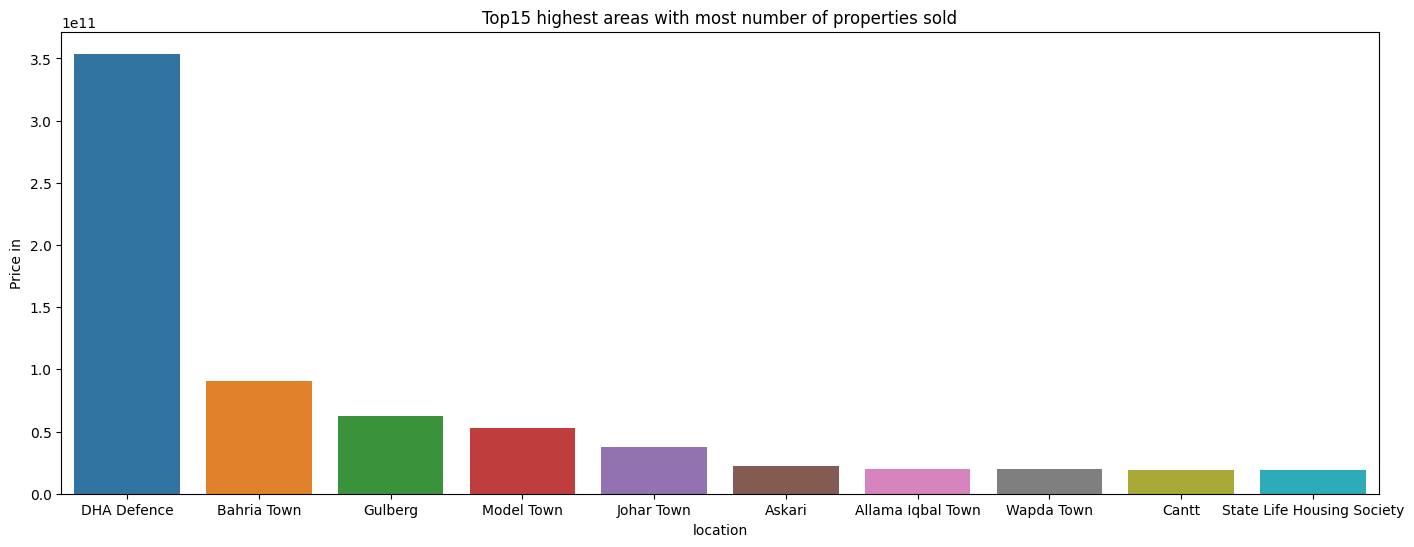

In [17]:
#lets plot and see the top 10 areas with most spendings
temp = df.groupby("location")['price'].sum().sort_values(ascending = False).reset_index()[:10]
plt.figure(figsize=(17,6))
sns.barplot(x='location', y='price', data=temp)
plt.title("Top15 highest areas with most number of properties sold")
plt.xlabel('location')
plt.ylabel('Price in')

#from the plot we can see DHA Defence is the top area with most spendings 

In [18]:
df["property_type"].value_counts()
# as we can see there are different types of properties but we will only deal with house, flat and farm house

House            39365
Flat              1640
Farm House         274
Upper Portion       69
Lower Portion       59
Penthouse           12
Room                 8
Name: property_type, dtype: int64

In [19]:
temp = df[df["property_type"].isin(["House", "Flat", "Farm House"])]
df = temp
df["property_type"].value_counts()

House         39365
Flat           1640
Farm House      274
Name: property_type, dtype: int64

In [20]:
df.head()

,property_type,price,location,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [21]:
df["Area Type"].value_counts()

Marla    31240
Kanal    10039
Name: Area Type, dtype: int64

In [22]:
df["area"].value_counts()
# now we can see our data is distributed from marlas to kanals
# lets make sure our data is only in one unit and that is going to be kanal as it is a smaller unit

5 Marla      8860
10 Marla     8232
1 Kanal      7693
3 Marla      3455
4 Marla      1433
             ... 
9.1 Marla       1
26 Kanal        1
4.6 Kanal       1
8.1 Kanal       1
3.7 Kanal       1
Name: area, Length: 231, dtype: int64

In [23]:
def convert_marla_to_kanal(value):
   # print(value)
    value = value.split(" ")

    if value[1] == "Marla":
        temp = float(value[0])
        value[0] = str(temp / 20)

    print(value[0])
    return value[0]


# this function will split and check whether the value is in kanal or marla, if it is in marla then it will convert it
# into kanal and return it otherwise it will return the original value i.e. kanal back

In [24]:

df["new_area"] = df["area"].apply(convert_marla_to_kanal)

6
1
0.45
1
0.55
1
0.4
1
1
1.6
0.375
1.2
0.5
0.5
0.5
1
0.9
0.5
0.6
0.55
1
0.15
0.5
0.5
0.5
0.5
1
0.5
0.5
0.5
0.5
1
6.5
0.125
1
0.4
2
8
1.1
2
0.3
1
4.7
0.485
1
0.5
0.9
0.5
0.5
0.85
0.5
0.5
1
0.5
0.5
0.5
0.5
0.5
0.2
0.5
0.25
0.7
2
1
0.275
0.85
1
1
0.5
0.1
0.1
1.1
1
0.5
1
0.6
0.5
0.5
0.5
0.41
0.85
0.6
0.5
0.5
0.5
0.5
0.5
1
8
2
0.15
1
2
10
1
0.15
4
0.35
0.35
1
1
0.25
0.505
1
4.4
2
1
1
1
0.7
1
0.75
1.7
1
1
1
1
0.1
0.5
2
1
1
0.5
0.3
0.15
1
0.1
0.4
0.5
1.2
5
0.5
0.5
1
2
0.65
1
1
1.5
0.5
2
0.25
1
4
0.25
0.25
0.25
4
0.5
0.25
1
0.5
0.85
0.85
1
0.25
0.15
0.5
0.5
1.4
0.5
1
0.5
2
1
1
1
2
0.7
1
1
2
0.5
1
0.7
1.3
0.2
1
0.25
0.215
1
2
1
0.7
1.6
1
0.2
1.2
1
0.5
0.4
0.25
0.25
0.5
0.25
0.5
0.3
0.125
1
1.6
2
0.15
0.5
1
1
1
1
0.2
2.2
0.5
1
0.35
1
1
1
0.6
1
1
1
0.55
0.5
0.4
1
0.25
0.49000000000000005
0.5
0.5
0.15
1
1
0.5
1
0.5
0.25
0.35
1
1
1
1
1
0.3
0.6
0.5
2
1
1
1
1
1
1
0.5
0.5
1
0.6
1
0.5
0.5
0.5
0.5
1
0.5
0.5
1
0.5
0.25
0.5
0.15
2.2
0.5
1
0.25
0.5
0.3
1
1
0.5
1
0.5
1
1
1
1
1
2
1
1
0.5
1
0.5
0.5
0.25
0.9


In [25]:
df['location'].value_counts()

DHA Defence                   7380
Bahria Town                   4796
Johar Town                    1927
Allama Iqbal Town             1027
Askari                        1013
                              ... 
Alia Town                        1
Madar-e-Millat Road              1
Vital Homes Housing Scheme       1
Ashraf Garden                    1
Sundar                           1
Name: location, Length: 619, dtype: int64

In [26]:
#lets remove all the locations which are present less then 25 times
# removing them is important because it may effect our model

df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()
location_count_less_10 = location_count[location_count <= 25]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

df['location'].value_counts()

DHA Defence                      7380
Bahria Town                      4796
other                            3106
Johar Town                       1927
Allama Iqbal Town                1027
                                 ... 
New Chauburji Park                 27
Mozang                             27
T & T Aabpara Housing Society      27
Al Hamad Colony                    26
Islam Nagar                        26
Name: location, Length: 163, dtype: int64

In [27]:
#lets remove the extra features
df = df.drop(["area", "purpose", "Area Type" , "Area Size", "Area Category"], axis = 1)
df.head()

,property_type,price,location,baths,bedrooms,new_area
47,House,220000000,Model Town,0,0,6
48,House,40000000,Multan Road,5,5,1
49,House,9500000,Eden,0,3,0.45
50,House,125000000,Gulberg,7,8,1
51,House,21000000,Allama Iqbal Town,5,6,0.55


In [28]:
# lets remove all the rows with no bedroom and baths
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)
df.head()

,property_type,price,location,baths,bedrooms,new_area
48,House,40000000,Multan Road,5,5,1
50,House,125000000,Gulberg,7,8,1
51,House,21000000,Allama Iqbal Town,5,6,0.55
52,House,52000000,Gulberg,6,5,1
53,House,16500000,Military Accounts Housing Society,7,6,0.4


In [29]:
df = df[df.new_area != "4,450"]
df = df[df.new_area != "4,500"]

In [30]:
df['area_sqft'] = df['new_area'].astype(float) * 5445
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft
48,House,40000000,Multan Road,5,5,1,5445.00
50,House,125000000,Gulberg,7,8,1,5445.00
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75
52,House,52000000,Gulberg,6,5,1,5445.00
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00


In [31]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576


In [32]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(20)

location
DHA Defence                          6784
Bahria Town                          4286
other                                2422
Johar Town                           1528
Askari                                937
State Life Housing Society            784
Allama Iqbal Town                     694
Wapda Town                            679
Al Rehman Garden                      656
Bahria Orchard                        517
Model Town                            508
Gulberg                               457
Cantt                                 435
Paragon City                          430
Lalazaar Garden                       349
DHA 11 Rahbar                         346
Pak Arab Housing Society              345
Sabzazar Scheme                       336
Samanabad                             315
Military Accounts Housing Society     310
Name: location, dtype: int64

In [33]:
len(location_stats[location_stats <= 10])
# we can see the there are 363 values under 10 so we can categorize them as other
# it will also help us in dimensinality reduction as

2

In [34]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)
len(location_stats[location_stats <= 10])

2

In [35]:
df['location'].nunique()

162

In [36]:
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576


In [37]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

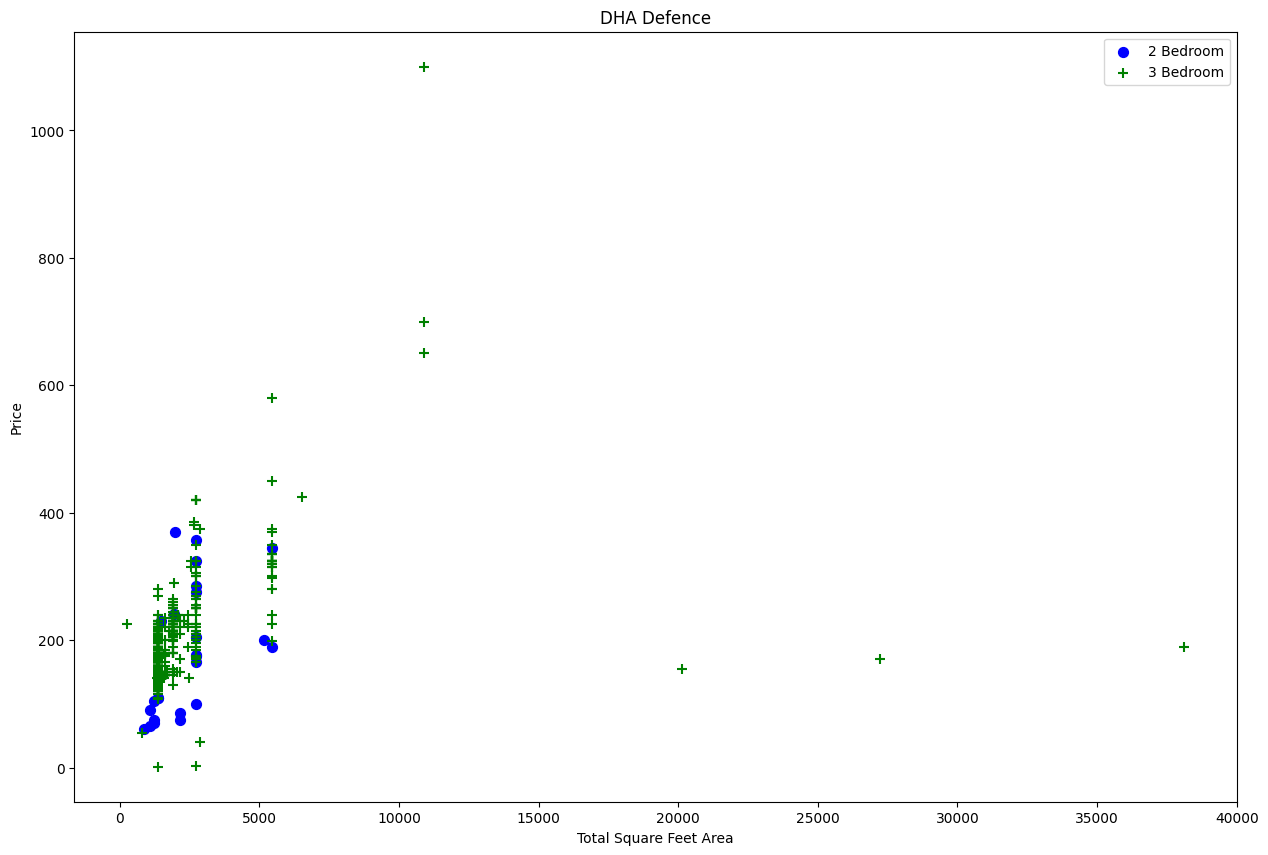

In [38]:
plot_scatter_chart(df, "DHA Defence")

REMOVING OUTLIERS


In [39]:
df.head(20)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.000,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.000,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.750,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.000,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.000,7575.757576
57,House,13500000,Eden,4,4,0.375,2041.875,6611.570248
58,House,87500000,Upper Mall,5,4,1.2,6534.000,13391.490664
61,House,23500000,Askari,4,4,0.5,2722.500,8631.772268
62,House,22500000,Bedian Road,4,4,1,5445.000,4132.231405
63,House,50000000,other,7,6,0.9,4900.500,10203.040506


In [40]:
df["price_per_sqft"].describe()

count    3.399200e+04
mean              inf
std               NaN
min      7.346189e-04
25%      6.427916e+03
50%      7.870917e+03
75%      9.182736e+03
max               inf
Name: price_per_sqft, dtype: float64

In [41]:
# price = df['price']
# price.value_counts().sum()

In [42]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

In [43]:
# df = df[(df['price'] > (Q1 - 1.5 * IQR)) & (df['price'] < (Q3 + 1.5 * IQR))]
# df.shape

In [44]:
min_thresold, max_thresold = df["price_per_sqft"].quantile([0.1, 0.999])
min_thresold, max_thresold

(4897.459442913988, 68885.39944904485)

In [45]:
# now lets see the price less the minimum threseold
df[df["price_per_sqft"] < min_thresold].head(12)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
62,House,22500000,Bedian Road,4,4,1,5445.000,4132.231405
68,House,3200000,Chungi Amar Sadhu,2,3,0.15,816.750,3917.967554
314,Flat,3200000,Mozang,2,2,0.15,816.750,3917.967554
430,Flat,13000000,Askari,3,3,0.505,2749.725,4727.745502
440,House,45000000,Bahria Town,4,5,1.7,9256.500,4861.448712
451,Flat,7000000,Askari,2,2,0.3,1633.500,4285.277013
456,House,12500000,Canal Garden,3,2,0.5,2722.500,4591.368228
457,House,30000000,other,5,5,1.2,6534.000,4591.368228
463,House,13700000,Al Faisal Town,6,5,0.65,3539.250,3870.876598
488,House,7900000,other,4,3,0.5,2722.500,2901.744720


In [46]:
# now lets see the price more then the max thresold
df[df["price_per_sqft"] > max_thresold].head(12)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
8532,House,100300000,Paragon City,3,3,0.25,1361.250,7.368228e+04
9030,House,132000000,Defence Road,3,3,0.3,1633.500,8.080808e+04
9242,House,425000000,DHA Defence,4,5,1,5445.000,7.805326e+04
38288,House,12500000,Johar Town,5,5,0.0,0.000,inf
39540,House,96000000,Al-Kabir Town,4,3,0.25,1361.250,7.052342e+04
42466,House,98000000,other,3,5,0.25,1361.250,7.199265e+04
52152,House,265000000,DHA Defence,5,4,0.55,2994.750,8.848819e+04
63143,House,76000000,other,2,4,0.125,680.625,1.116621e+05
79223,House,69000000,DHA Defence,7,5,0.05,272.250,2.534435e+05
86961,House,26000000,DHA Defence,5,4,0.05,272.250,9.550046e+04


In [47]:
# so anything less the minimum thresold and greater then the maximum thresold is an outlier which can hurts our model performance
# so removing outlier is a much better option

df = df[(df["price_per_sqft" ] < max_thresold) & (df["price_per_sqft"] > min_thresold)]
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576


In [48]:
df.shape

(30486, 8)

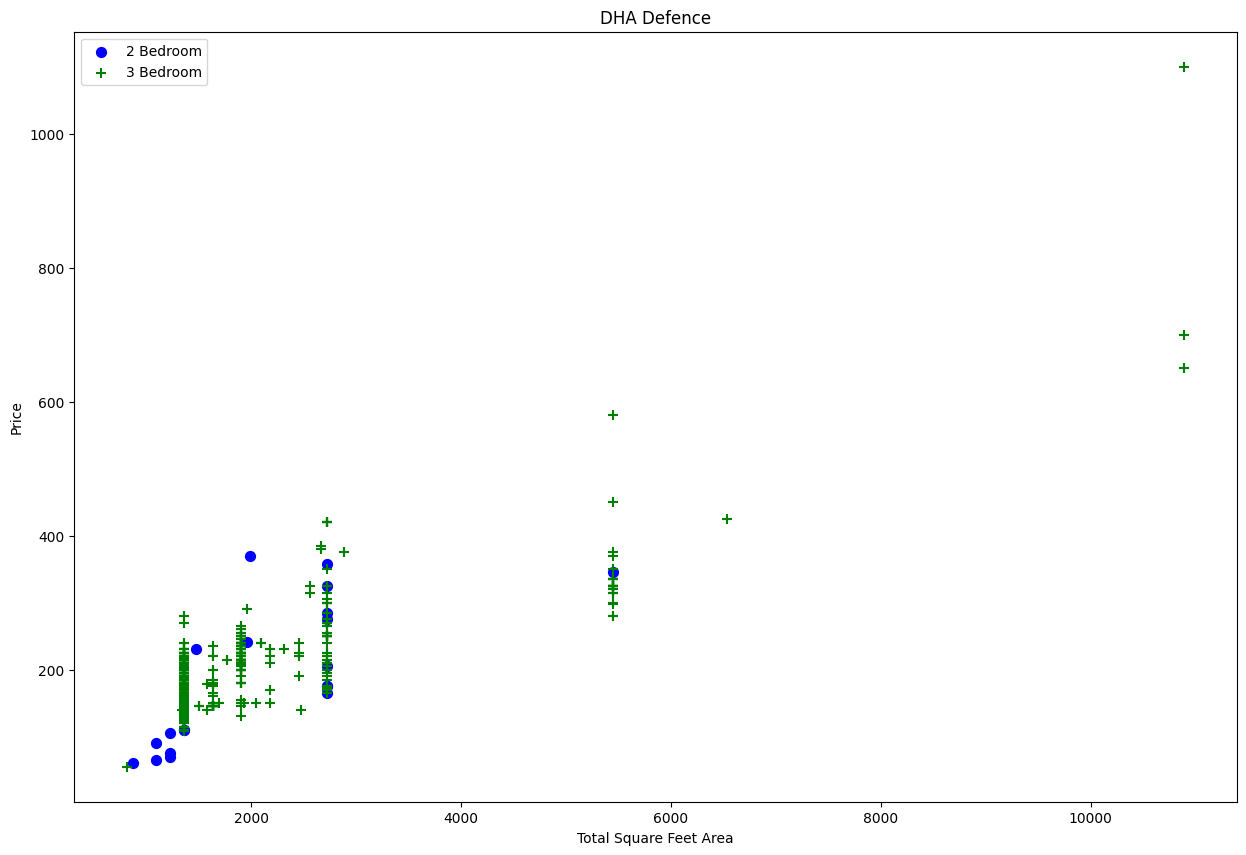

In [49]:
plot_scatter_chart(df, "DHA Defence")
#from the following plot we can clearly see most of the 3 bedrooms houses have higher price then 2 bedroom houses

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

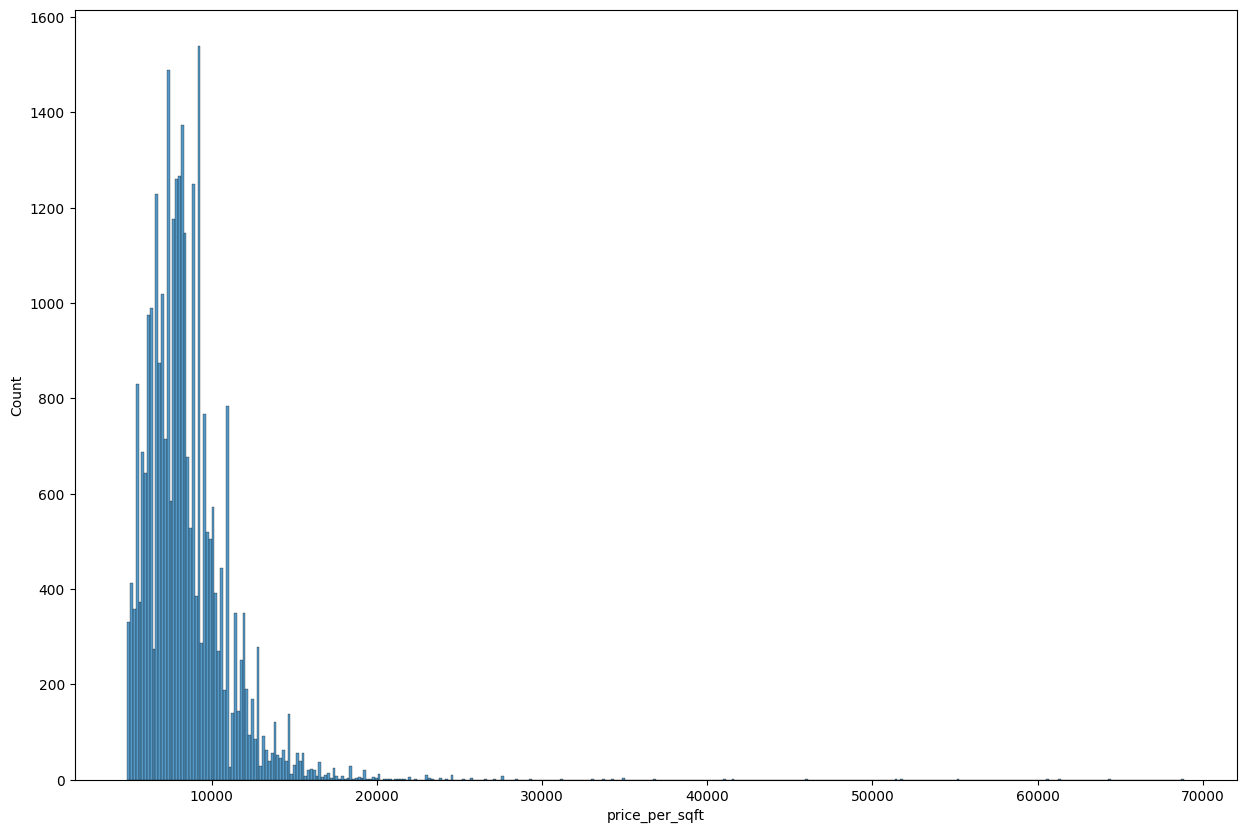

In [50]:
sns.histplot(data = df, x = "price_per_sqft")
#from the following plot we can see most of our price are under 10000, after 10000 the count starts decreasing 

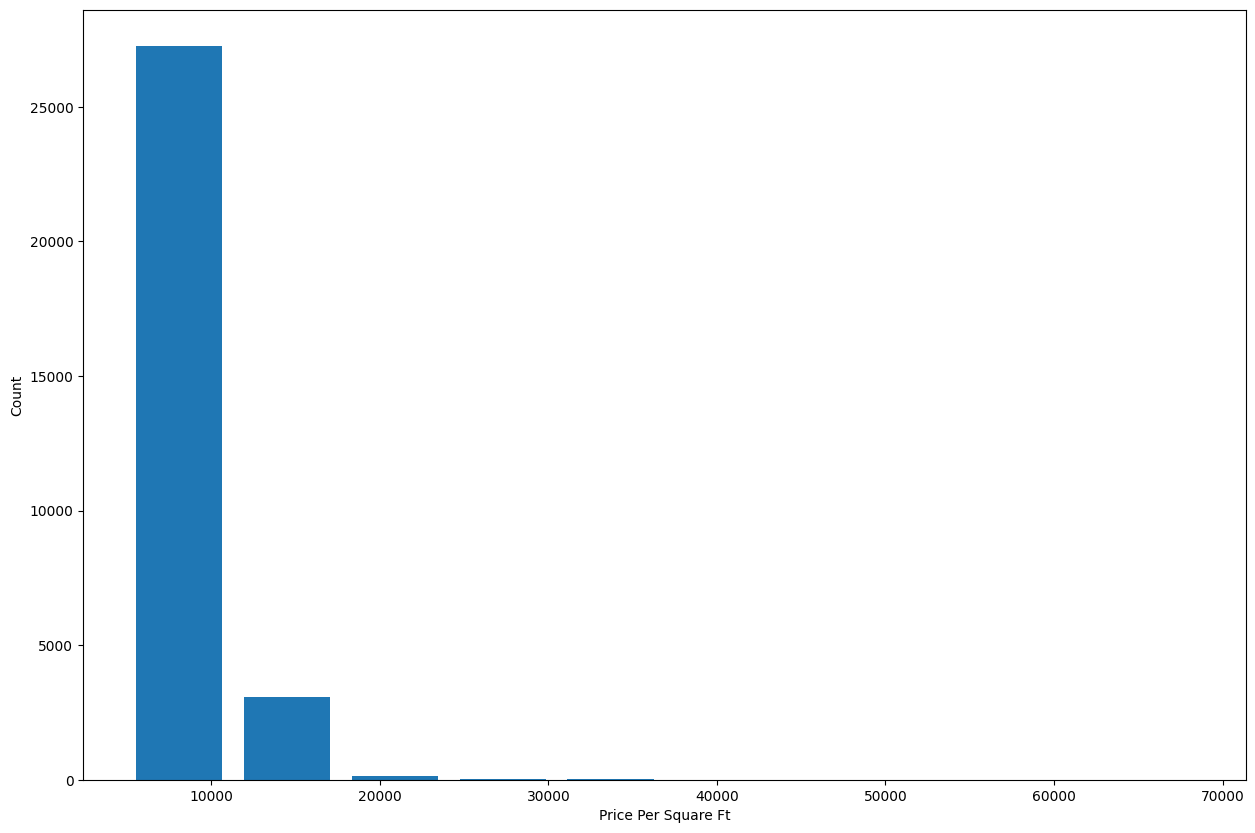

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

Creating dummy varibales


In [52]:
dummies = pd.get_dummies(df["location"])
dummies.head()

#creating dummy vairables for the location.Only the area in which a property exists will have a value of 1, all the remaining 
# area  will have a value of 0

,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,Al Rehman Garden,Al-Hamad Colony (AIT),Al-Kabir Town,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,others
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df = pd.concat([df, dummies], axis = "columns") 
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,others
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164,0,0,...,0,0,0,0,0,0,0,0,0,0
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139,0,0,...,0,0,0,0,0,0,0,0,0,0
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475,0,0,...,0,0,0,0,0,0,0,0,0,0
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914,0,0,...,0,0,0,0,0,0,0,0,0,0
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# we dont need the price the 'location' and the 'other' column so we will simply drop it
df = df.drop(['location', 'others'], axis = 1)
df.head()

,property_type,price,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,...,Township,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other
48,House,40000000,5,5,1,5445.00,7346.189164,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,House,125000000,7,8,1,5445.00,22956.841139,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,House,21000000,5,6,0.55,2994.75,7012.271475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,House,52000000,6,5,1,5445.00,9550.045914,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,House,16500000,7,6,0.4,2178.00,7575.757576,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df["property_type"].value_counts()

House         29728
Flat            756
Farm House        2
Name: property_type, dtype: int64

In [56]:
# now lets map the proert type as it can be useful for our prediction but we need to conver it into numeric form
new_map = {
    'House':1,
    'Flat':2,
    'Farm House':3
}
df['new_property_type'] = df['property_type'].map(new_map)
df.head()

,property_type,price,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,House,40000000,5,5,1,5445.00,7346.189164,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,House,125000000,7,8,1,5445.00,22956.841139,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,House,21000000,5,6,0.55,2994.75,7012.271475,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,House,52000000,6,5,1,5445.00,9550.045914,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,House,16500000,7,6,0.4,2178.00,7575.757576,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
#lets drop the propetry type column as we will not use that anymore
df = df.drop(['property_type'], axis=1)

In [58]:
# as of now, we dont need the price_per_sqft and new_area so we will drop them
df = df.drop(['price_per_sqft', 'new_area'], axis=1)
df.head()

,price,baths,bedrooms,area_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,40000000,5,5,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,125000000,7,8,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,21000000,5,6,2994.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,52000000,6,5,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,16500000,7,6,2178.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


BUILDING MODEL

In [59]:
X = df.drop('price', axis = 1)
X.head()

,baths,bedrooms,area_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,5,5,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,7,8,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,5,6,2994.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,6,5,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,7,6,2178.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y = df['price']

In [61]:
#splitting the training and testing data by 70% and 30% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

#building a linear regression model and training it on the X_train and y_train
lReg = LinearRegression()
lReg.fit(X_train, y_train)

#using .predict() method to predict the output on X_test and X_train and then storing it in y_predict and y_predict_train respectively
y_predict = lReg.predict(X_test)
y_predict_train = lReg.predict(X_train)

print("accuracy for training data: ", lReg.score(X_train, y_train))
print("accuracy for test data: ", lReg.score(X_test, y_test))


accuracy for training data:  0.8096349291296685
accuracy for test data:  0.8216437346324668


PART D: TESTING 

After using the .score() function we can now clearly see the our accuracy is more then 82 percent which is considerably really good. Our model now can predict with upto 82 percent accuracy.

Plotting the predicted output(y_predict) in the blue color against expected output(y_test) in the green color, we can clearly see the most of the predicted data points are really close to the expected output line which means our model has performed quite well in predicting the House Prices. The close the dat apoints are to the expected output line, the better our model is.

Just to make sure if our model is working fine, I made an array with some values i.e. the input values and used the .predict() method to see the output. Our Model predicted a pretty nice value for a 4 bed 4 bath 1500sqft_area as expected.
Its an crucial part to see if our model is working or not. If our model is unable to predict any price it simply means it contains error but in our case our model is predicting the price which means it works fine.

Pipeline helps a lot in simplifying the code. I used a pipeline and chained the standardscaler and LinearRegression together and used the. fit() method to train and .score() method to see the score which is again just a little more then 82 percent.

Used cross_val_score score to estimate the performance of the model again. I used the 5 fold cross validation here and ended up with an accuracy of 80% which still is not bad but lesser then our model without using the cross_val_score. It is really important to specify the k-fold cross validations to a correct number because our model is repeated k times and calculats the accuracy on every fold.

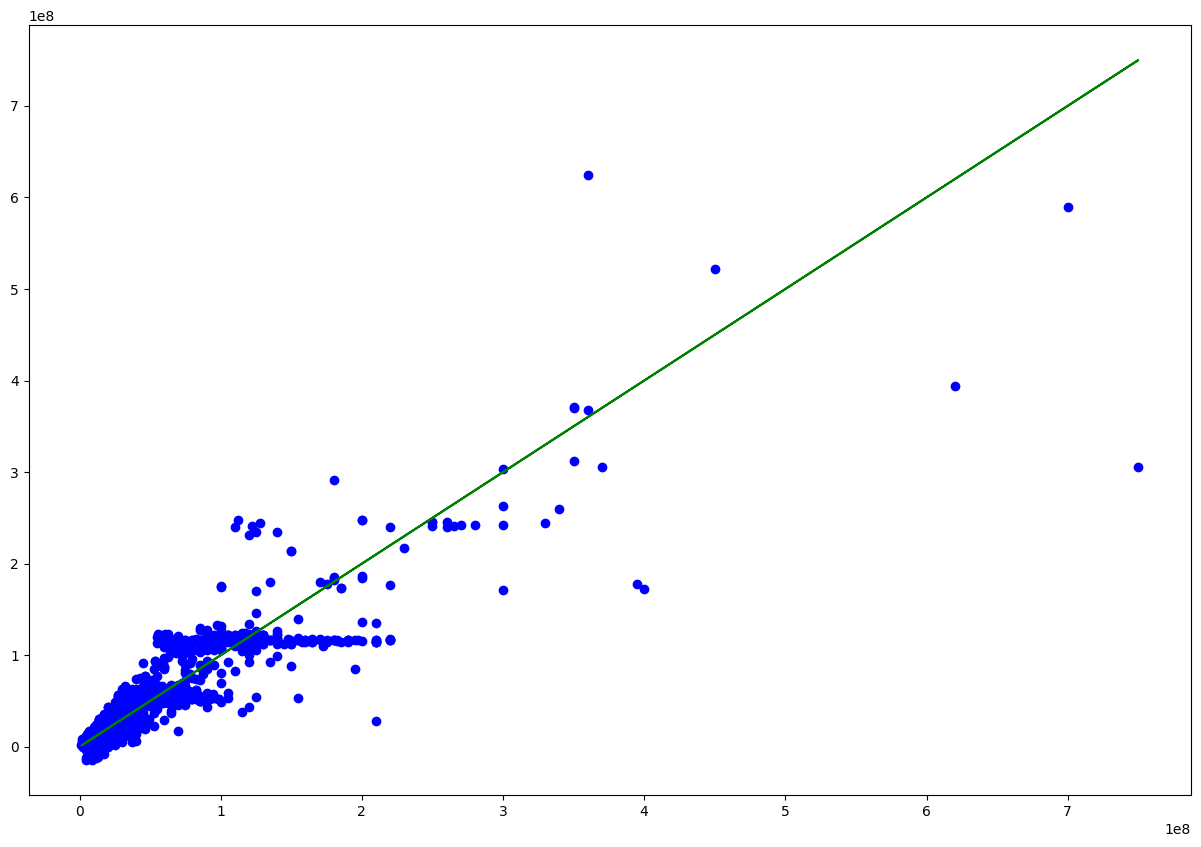

In [62]:
plt.scatter(y_test, y_predict,  color='blue')
plt.plot(y_test, y_test, color='green')
plt.show()

In [63]:
lReg.score(X_test, y_test)

0.8216437346324668

In [64]:
#lets make a list here with 4 bedrooms, 4 bathrooms, with an area of 1500.21 area_sqft and the location is "Airport Road"

#as our data contains 160 locations, we can loop through all that locations and can store 1 on a particular index of our list 
# where "Airport Road is found and can store 0 on all the remaining indexes."
testing_list = [4,4,1500.21]
for i,j in enumerate(X_test.columns):
    if i == 160:
        break
    if j == "Airport Road":
        testing_list.append(1)
    else:
        testing_list.append(0)

# we need to convert our list to a an array in order to reshape it so we can test and predict the value on our trained model
testing_list = np.array(testing_list)
testing_list = testing_list.reshape(1,-1)
predicted_price = lReg.predict(testing_list)
predicted_price

# we can see the predicted price for a 4bed, 4 bath, 1500.21area_sqm


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14320068.39221541])

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pipe = Pipeline(steps=[
    ('StandardScaler', StandardScaler()),
    ('LinearRegression', LinearRegression(normalize=True))
])

In [66]:
pipe.fit(X_train, y_train)
new = pipe.predict(X_test)
pipe.score(X_test, y_test)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.8216437346324577

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

#we can see after using the corss_val_score, our accuracy is now to 80 percent

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

[0.78235216 0.82290565 0.79571174 0.81308436 0.79510711]
0.8018322061641847
0.01437261645772096


PART E: EVALUATION

R2 score decribes the correlation between predicted and observed value. If R2 is 0 it means there is no correlation between redicted and observed value while if it is 1 then it indicates a perfect correlation. In our case r2 is 0.82 which means there is high correlation between the predicted and the observed value.

Mse and Rmse are quite high which means there is a high error but as we can see our r2 is very high too. This simply means our model predicts with more then 82 percent accuracy but the prediction which our model makes wrong is very wrong that is the reason our mse and rmse is high.

The accuracy of our test case is around 82 percent which means our model is predicting with 82 percent accuracy on our testing dataset which is pretty good. Our model has been trained on more then 26000 rows and has been tested on around 8000 rows

As we can see the error for TRAINING AND for TESTING data is high which clearly means our model is facing underfitting. 
Underfitting can be removed by increase in the features, by removing the noisy data, removing the outliers.

Using this model is really helpful due to the high accuracy. If someone need to sell the property, by just entering the number of bedroom, number of bathrooms, total_area, and his living_area, he can get an estimated price of his house and same goes for a person whi want to buy the property.

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
import math

In [69]:
r2 = r2_score(y_test, y_predict)
r2

0.8216437346324668

In [70]:
mse = mean_squared_error(y_train, y_predict_train)
mse

215223438175585.03

In [71]:
rmse = math.sqrt(mse)
rmse

14670495.498638928

In [72]:
mse = mean_squared_error(y_test, y_predict)
mse

238270194570533.38
176997222360629.94

176997222360629.94

In [73]:
rmse = math.sqrt(mse)
rmse

13304030.305160535